<a href="https://colab.research.google.com/github/smrutisikha2001/EDA-Heart-Disease-Analysis/blob/main/Heart_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from the CSV file

In [3]:
data = pd.read_csv(r"/content/heart.csv")

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


-> age (in years)

-> sex
(1 = male; 0 = female)

-> cp: chest pain type (4 values)
	Value 0: typical angima
	Value 1: atypical angima
	Value 2: non-angimal pain
	Value 3: asymptomatic

->trestbps: resting blood pressure
resting blood pressure (in mm Hg on admission to the hospital)

->chol: serum cholestoral in mg/dl

->fbs: fasting blood sugar > 120 mg/dl(1 = true; 0 = false)

->restcg: resting electrocardiographic results (values 0,1,2)
	Value 0:normal
	Value 1:having ST-T wave abnormality
	Value 2:showing probable or definite left ventricular hypertrophy by 		Estes' criteria

->thalach: maximum heart rate achieved

->exang: exercise induced angina (1 = yes; 0 = no)

-> oldpeak = ST depression induced by exercise relative to rest

->slope: the slope of the peak exercise ST segment
	Value 1: upsloping
	Value 2: flat
	Value 3: downsloping

-> ca: number of major vessels (0-3) colored by flourosopy

-> thal: 1 = normal; 2 = fixed defect; 3 = reversable defect

-> target = the presence of heart disease in the patient.
It is integer valued 0 = no disease and 1 = disease.

In [7]:
data.shape

(1025, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [15]:
data.duplicated().any()

np.True_

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(302, 14)

Correlation Matrix

In [18]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

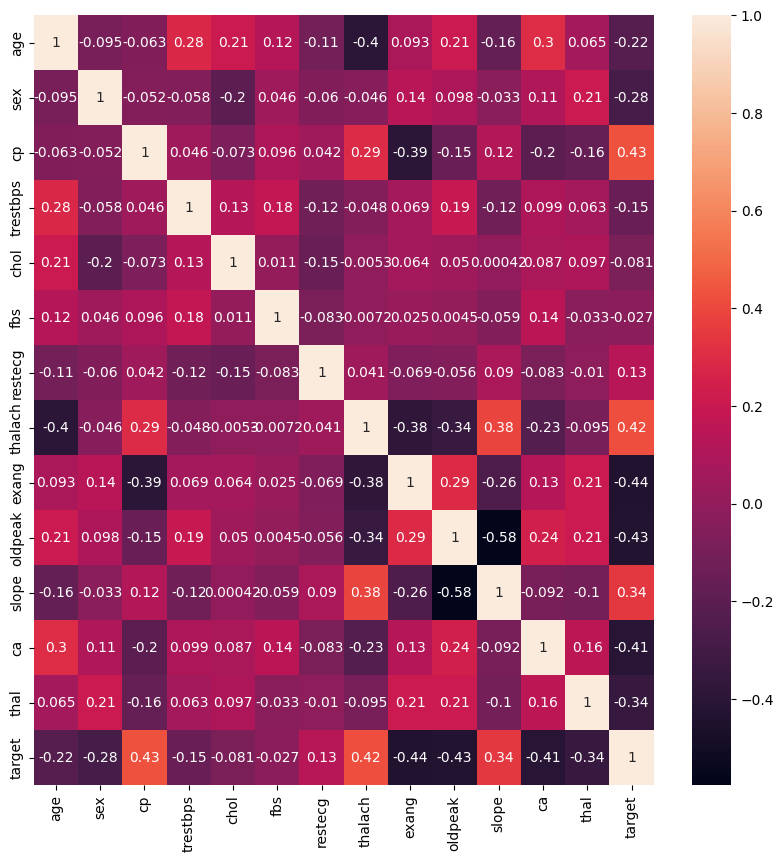

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [25]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
data['target'].value_counts()

,count
target,
1,164
0,138


<ipython-input-35-38c37bd4bc7e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['target'], palette='deep')


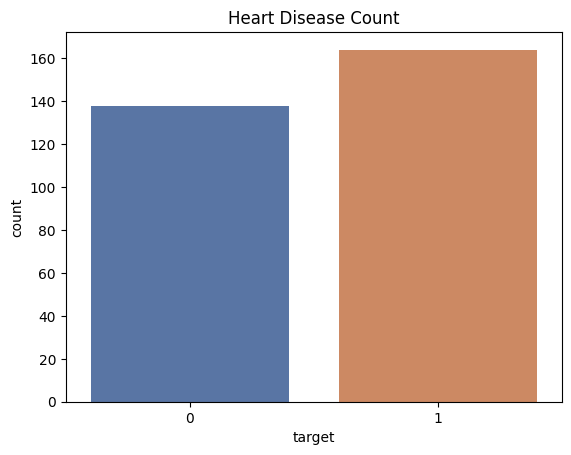

In [35]:
sns.countplot(x = data['target'], palette='deep')
plt.title('Heart Disease Count')
plt.show()

 Find Count of  Male & Female in this Dataset

In [28]:
data['sex'].value_counts()

,count
sex,
1,206
0,96


<ipython-input-41-e64e1e52e77c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['sex'], palette='deep')


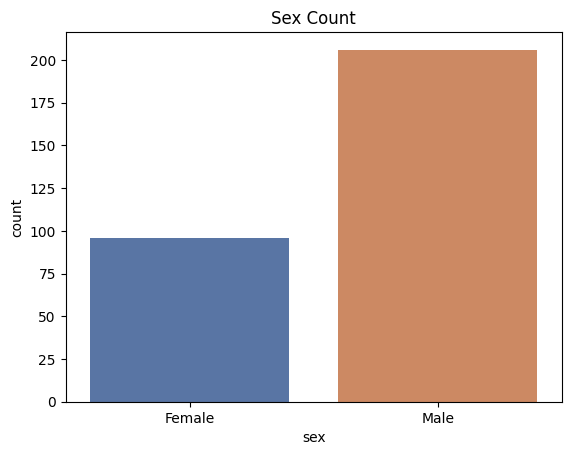

In [41]:
sns.countplot(x = data['sex'], palette='deep')
plt.xticks([0,1],['Female','Male'])
plt.title('Sex Count')
plt.show()

Find Gender Distribution According to The Target Variable

In [29]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
data.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: count, dtype: int64

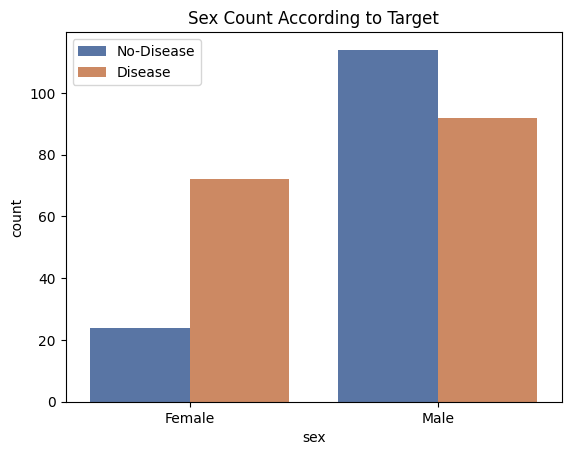

In [45]:
sns.countplot(x='sex', hue='target', data=data, palette='deep')
plt.xticks([0,1],['Female','Male'])
plt.legend(['No-Disease','Disease'])
plt.title('Sex Count According to Target')
plt.show()

 Check Age Distribution In The Dataset

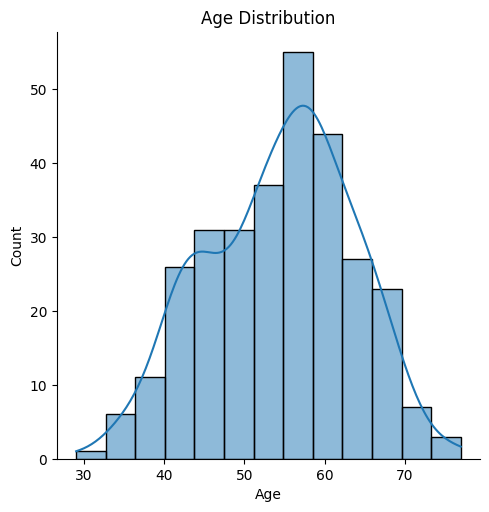

In [58]:
sns.displot(data['age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

Check Chest Pain Type


In [46]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [47]:
data['cp'].value_counts()

,count
cp,
0,143
2,86
1,50
3,23


<ipython-input-62-298121402930>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=data, palette='deep')


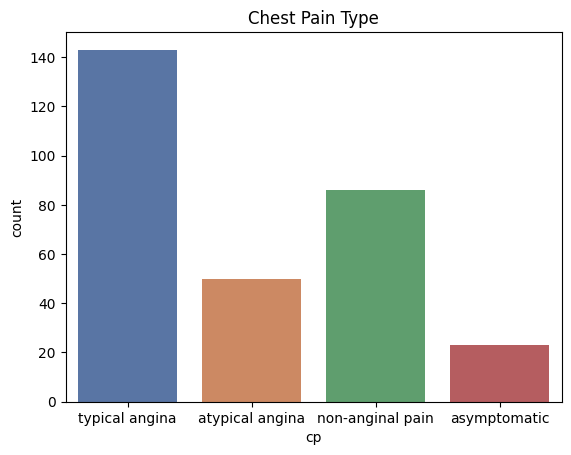

In [62]:
sns.countplot(x='cp', data=data, palette='deep')
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.title('Chest Pain Type')
plt.show()

Show The Chest Pain Distribution As Per Target Variable

In [49]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [50]:
data.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          68
    0          18
3   1          16
    0           7
Name: count, dtype: int64

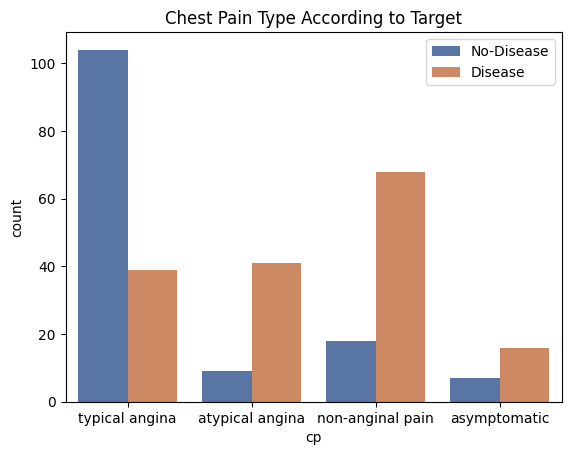

In [63]:
sns.countplot(x='cp', hue = 'target', data=data, palette='deep')
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.legend(['No-Disease','Disease'])
plt.title('Chest Pain Type According to Target')
plt.show()

Show Fasting Blood Sugar Distribution According To Target Variable

In [64]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [68]:
data.groupby('fbs')['target'].value_counts()

fbs  target
0    1         141
     0         116
1    1          23
     0          22
Name: count, dtype: int64

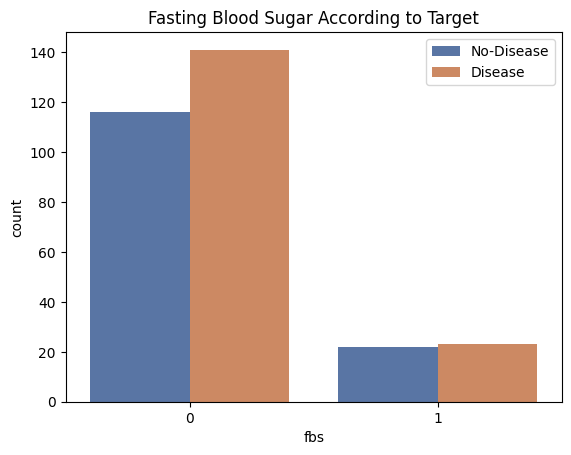

In [69]:
sns.countplot(x='fbs',hue='target', data=data, palette='deep')
plt.legend(['No-Disease','Disease'])
plt.title('Fasting Blood Sugar According to Target')
plt.show()

Check Resting Blood Pressure Distribution

In [70]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

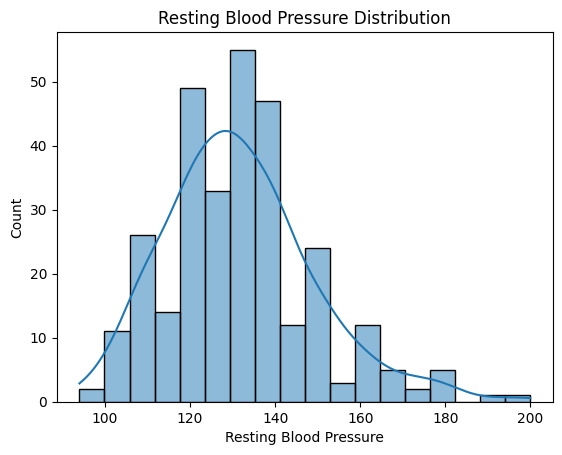

In [74]:
sns.histplot(data['trestbps'], kde=True)
plt.xlabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure Distribution')
plt.show()

 Compare Resting Blood Pressure As Per Sex Column

In [72]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

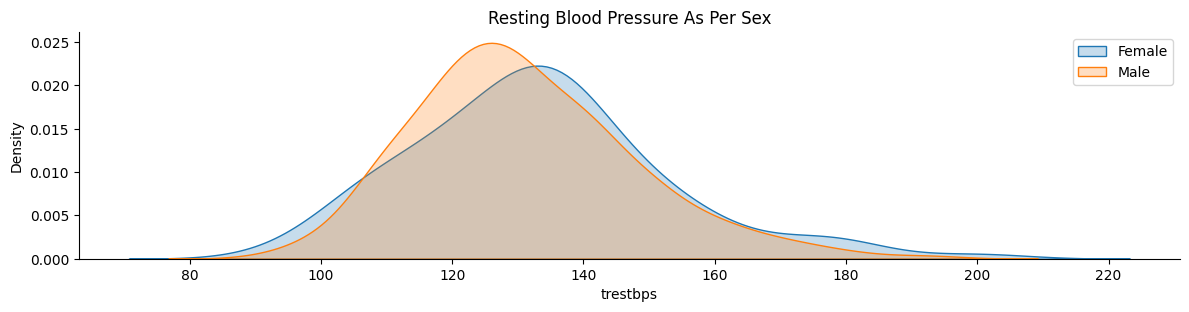

In [81]:
g = sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(['Female','Male'])
plt.title('Resting Blood Pressure As Per Sex')
plt.show()

Males tend to have a slightly higher average resting blood pressure than females in this dataset. The peak of the orange KDE (Male) is located at a slightly higher 'trestbps' value (around 130-135) compared to the peak of the blue KDE (Female) (around 125-130).



 Show Distribution of Serum cholesterol

In [83]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

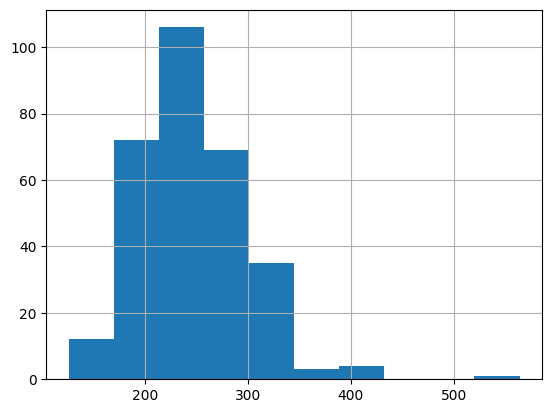

In [85]:
data['chol'].hist()

Plot Continuous Variables

In [86]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [88]:
categorical_val = []
cont_val = []
for col in data.columns:
  if data[col].nunique() <= 10:
    categorical_val.append(col)
  else:
    cont_val.append(col)
print('Categorival columns: ', categorical_val)
print('Continous columns:' , cont_val)

Categorival columns:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continous columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


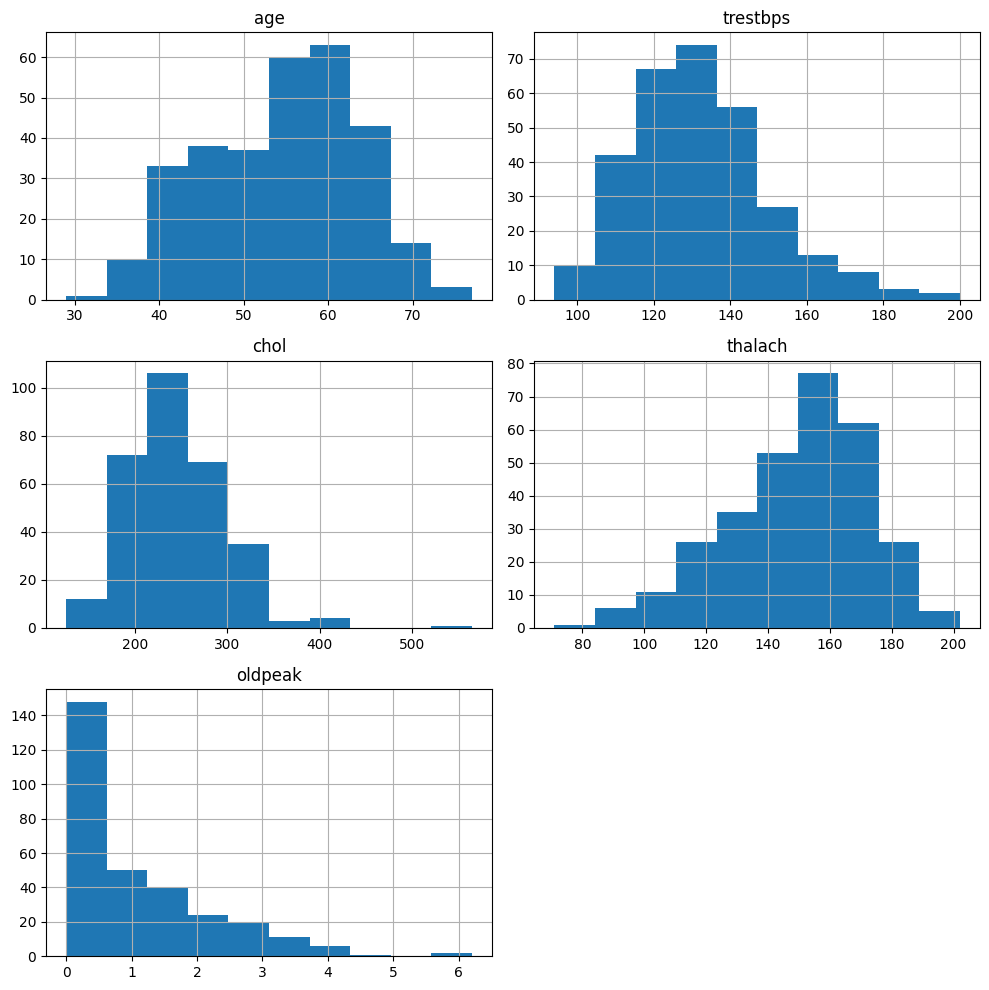

In [92]:
data.hist(cont_val, figsize=(10,10))
plt.tight_layout()
plt.show()

**Age:**

The distribution is somewhat skewed to the right (positive skew).
The peak of the distribution appears to be in the 50-60 age range, suggesting this is the most common age group in the dataset.
There are fewer individuals in the younger age groups (below 40) and older age groups (above 70).

**trestbps (Resting Blood Pressure):**

The distribution appears to be roughly normal or slightly skewed to the right.
The peak of the distribution is in the range of approximately 120-140 mmHg.
There are fewer individuals with very low (below 100) or very high (above 180) resting blood pressure values.

**chol (Serum Cholestoral):**

The distribution is significantly skewed to the right (positive skew).
The majority of individuals have cholestoral levels between roughly 200 and 300 mg/dl.
There is a long tail extending towards higher cholestoral values, indicating the presence of some individuals with considerably higher levels.

**thalach (Maximum Heart Rate Achieved):**

The distribution is somewhat skewed to the left (negative skew).
The peak of the distribution is in the range of approximately 140-180 bpm.
There are fewer individuals with very low maximum heart rates, and a tail extending towards lower values. This is somewhat expected as maximum heart rate tends to decrease with age.

**oldpeak (ST depression induced by exercise relative to rest):**

The distribution is heavily skewed to the right (positive skew).
A large proportion of individuals have an oldpeak value close to 0.
The frequency decreases rapidly as the oldpeak value increases, indicating that higher levels of ST depression are less common.